# 3 Drell-Yan Event Generator with VEGAS
Consider the Drell-Yan production process at an electron-positron collider, in which an electron and positron
collide to produce a virtual photon or a Z boson that then decays into a muon-antimuon pair,
$e^+e^- \rightarrow Z/\gamma \rightarrow \mu^+\mu^-$. As described in lecture and in Ref. [5], the differential cross section for center-of-mass energy $E_{CM} = \sqrt{\hat{s}}$ and scattering angle $\theta$ is given by

$$\frac{d\sigma}{d\Omega}(\hat{s}, \cos \theta) = \frac{\alpha^2}{4\hat{s}} \left[ A_0(\hat{s})(1 + \cos^2\theta) + A_1(\hat{s}) \cos \theta \right],$$

Where $A_0$ and $A_1$ are given by

$$
A_0(\hat{s}) = Q_e^2 - 2Q_eV_\mu V_e \chi_1(\hat{s}) + (A_\mu^2 + V_\mu^2)(A_e^2 + V_e^2) \chi_2(\hat{s}),
$$

$$
A_1(\hat{s}) = -4Q_eA_\mu A_e \chi_1(\hat{s}) + 8A_\mu V_\mu A_e V_e \chi_2(\hat{s}),
$$

and the $\chi_1$ and $\chi_2$ are given by

$$
\chi_1(\hat{s}) = \frac{\kappa\hat{s}(\hat{s} - M_Z^2)}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\chi_2(\hat{s}) = \frac{\kappa^2 \hat{s}^2}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\kappa = \frac{\sqrt{2}G_F M_Z^2}{4\pi\alpha}.
$$

Useful constants are given in the tables below.

| Fermions        | $Q_f$ | $V_f$                                | $A_f$ |
|-----------------|-------|--------------------------------------|-------|
| $u, c, t$       | $+\frac{2}{3}$ | $\left(+\frac{1}{2} - \frac{4}{3}\sin^2\theta_W\right)$ | $+\frac{1}{2}$ |
| $d, s, b$       | $-\frac{1}{3}$ | $\left(-\frac{1}{2} - \frac{2}{3}\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |
| $\nu_e, \nu_\mu, \nu_\tau$ | $0$ | $\frac{1}{2}$ | $+\frac{1}{2}$ |
| $e, \mu, \tau$  | $-1$ | $\left(-\frac{1}{2} + 2\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |


| Variable                | Symbol            | Value                                                   |
|-------------------------|-------------------|---------------------------------------------------------|
| conversion factor       | $GeV−2 ↔ pb$      | $3.894 \times 10^8 \, \text{pb} = 1 \, \text{GeV}^{-2}$ |
| Z boson mass            | $M_Z$             | $91.188 \, \text{GeV}$                                  |
| Z boson width           | $\Gamma_Z$        | $2.4414 \, \text{GeV}$                                  |
| QED running coupling    | $\alpha$          | $\frac{1}{132.507}$                                     |
| Fermi constant          | $G_F$             | $1.16639 \times 10^{-5} \, \text{GeV}^{-2}$             |
| Weinberg angle          | $\sin^2\theta_W$  | $0.222246$                                              |


In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
#Preparation
Qe = -1
Ve = -1/2 + 2*(0.222246)
Ae = -0.50
Vm = -1/2 + 2*(0.222246)
Am = -0.50
alpha = 1/132.507
GF = 1.16639e-5
MZ = 91.188
GammaZ = 2.4414


def s_to_E(s):
    return np.sqrt(s)

# Function to calculate chi1(s)
def chi1(s):
    kappa = np.sqrt(2) * GF * MZ**2 / (4 * np.pi * alpha)
    return kappa * s * (s - MZ**2) / ((s - MZ**2)**2 + GammaZ**2 * MZ**2)

# Function to calculate chi2(s)
def chi2(s):
    kappa = np.sqrt(2) * GF * MZ**2 / (4 * np.pi * alpha)
    return kappa**2 * s**2 / ((s - MZ**2)**2 + GammaZ**2 * MZ**2)

# Coefficients A0(s) and A1(s)
def A0(s):
    return Qe**2 - 2 * Qe * Ve * Vm * chi1(s) + (Am**2 + Vm**2) * (Ae**2 + Ve**2) * chi2(s)

def A1(s):
    return -4 * Qe * Am * Ae * chi1(s) + 8 * Am * Vm * Ae * Ve * chi2(s)

# Differential cross section function
def diff_cross_section(s, cos_theta):
    return alpha**2 / (4 * s) * (A0(s) * (1 + cos_theta**2) + A1(s) * cos_theta)

In [8]:
def lego_plot(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel, title):
    x = np.array(xAmplitudes)  # turn x,y data into numpy arrays
    y = np.array(yAmplitudes)  # useful for regular matplotlib arrays

    fig = plt.figure()  # create a canvas, tell matplotlib it's 3d
    ax = fig.add_subplot(111, projection="3d")

    # make histograms - set bins
    hist, xedges, yedges = np.histogram2d(x, y, bins=(nBins, nBins))
    xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])

    xpos = xpos.flatten() / 2.0
    ypos = ypos.flatten() / 2.0
    zpos = np.zeros_like(xpos)

    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    dz = hist.flatten()

    cmap = mpl.colormaps["jet"]
    max_height = np.max(dz)  # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k - min_height) / max_height) for k in dz]

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort="average")
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)   
    plt.show()

def plot_histograms(s_values, theta_values, nBins):
    # Plot histogram for S
    plt.figure(figsize=(10, 4))
    plt.hist(s_values, bins=nBins, color='skyblue', edgecolor='black')
    plt.title('Histogram of S Values')
    plt.xlabel('S')
    plt.ylabel('Frequency')
    plt.show()

    # Plot histogram for E
    plt.figure(figsize=(10, 4))
    plt.hist(s_to_E(s_values), bins=nBins, color='lightcoral', edgecolor='black')
    plt.title('Histogram of E Values')
    plt.xlabel('E')
    plt.ylabel('Frequency')
    plt.show()

    # Plot histogram for theta
    plt.figure(figsize=(10, 4))
    plt.hist(theta_values, bins=nBins, color='lightgreen', edgecolor='black')
    plt.title('Histogram of Cosine(Theta) Values')
    plt.xlabel('Theta')
    plt.ylabel('Frequency')
    plt.show()

    # Plot histogram for cos(theta)
    plt.figure(figsize=(10, 4))
    plt.hist(np.arccos(theta_values), bins=nBins, color='salmon', edgecolor='black')
    plt.title('Histogram of Theta Values')
    plt.xlabel('Cos(Theta)')
    plt.ylabel('Frequency')
    plt.show()

In [9]:
s_min, s_max = 10**2, 200**2
COSTHETAMIN, COSTHETAMAX = -1, 1

XMIN, XMAX =  10**2, 200**2
YMAX, YMIN = -1, 1

# # Sampling differential cross-section over the domain to find the maximum value
# sampled_values = []
# for _ in range(100000):
#     random_s = np.random.uniform(s_min, s_max)
#     random_cos_theta = np.random.uniform(cos_theta_min, cos_theta_max)
#     value = diff_cross_section(random_s, random_cos_theta)
#     sampled_values.append(value)

# F_VAL_MAX = max(sampled_values)
F_VAL_MAX = 6.78765661236851e-07
           

In [10]:
 #Part a
def brute_force(nPoints, seed=None):
    nFunctionEval = 0
    s_rej_method = []
    cos_theta_rej_method = []
    maxWeightEncounteredRej = -1.0e20
    generator = np.random.RandomState(seed=seed)
    
    while len(s_rej_method) < nPoints:
        rr = generator.uniform(size=3)
        random_s = np.random.uniform(s_min, s_max)
        random_cos_theta = np.random.uniform(COSTHETAMIN, COSTHETAMAX)
        nFunctionEval += 1
        f_val = diff_cross_section(random_s, random_cos_theta)
       
        if f_val > maxWeightEncounteredRej:
            maxWeightEncounteredRej = f_val

        if f_val > F_VAL_MAX:
            print(
                f" f_val={f_val} exceeds F_VAL_MAX={F_VAL_MAX}, program will now exit"
            )
            exit(99)
            
        if f_val / F_VAL_MAX > rr[2]:
            s_rej_method.append(random_s)
            cos_theta_rej_method.append(random_cos_theta)
    return (s_rej_method, cos_theta_rej_method, nFunctionEval, maxWeightEncounteredRej)

s_rej_method, cos_theta_rej_method, nFunctionEval_rej, maxWeightEncounteredReJ = brute_force(100_000)
print(nFunctionEval_rej)


6573754


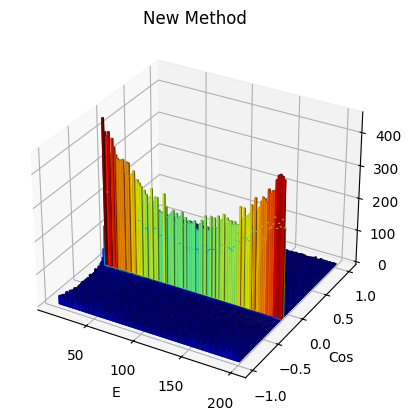

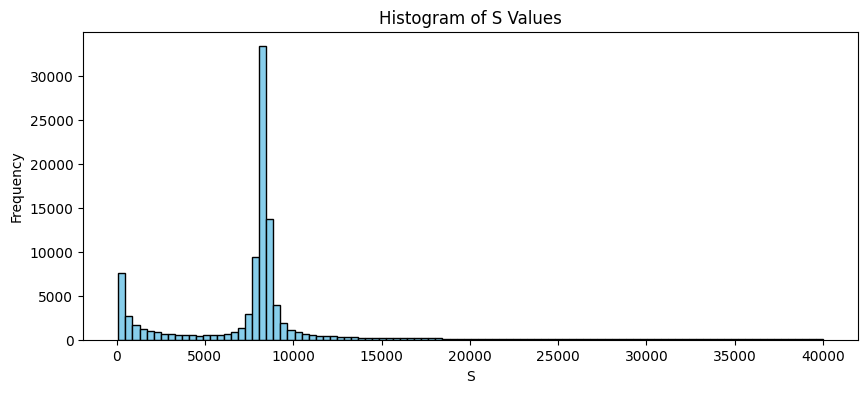

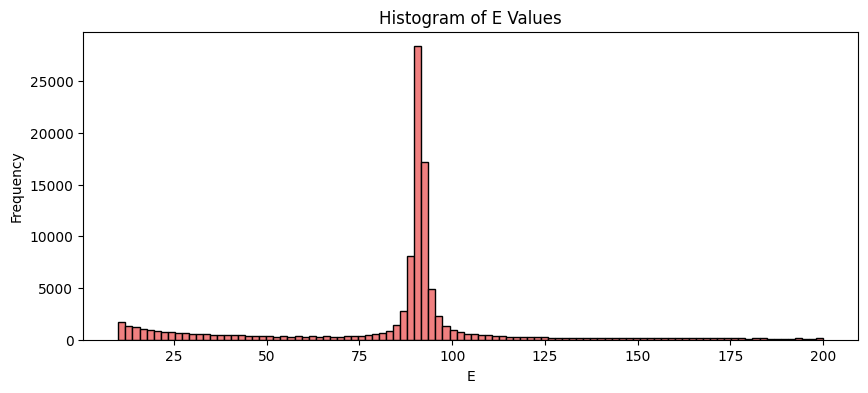

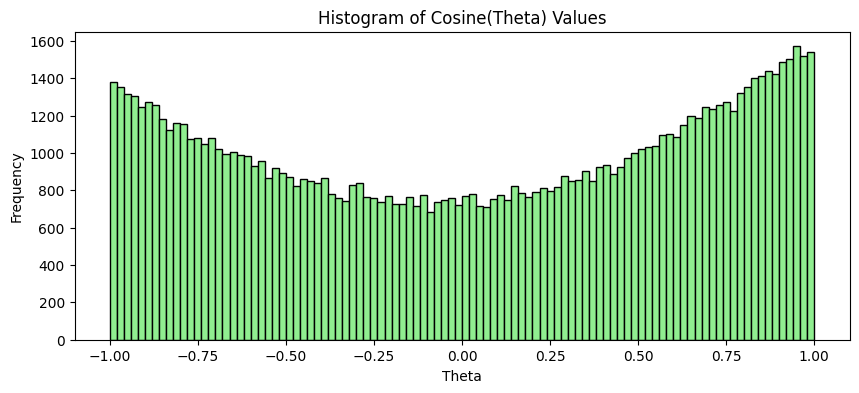

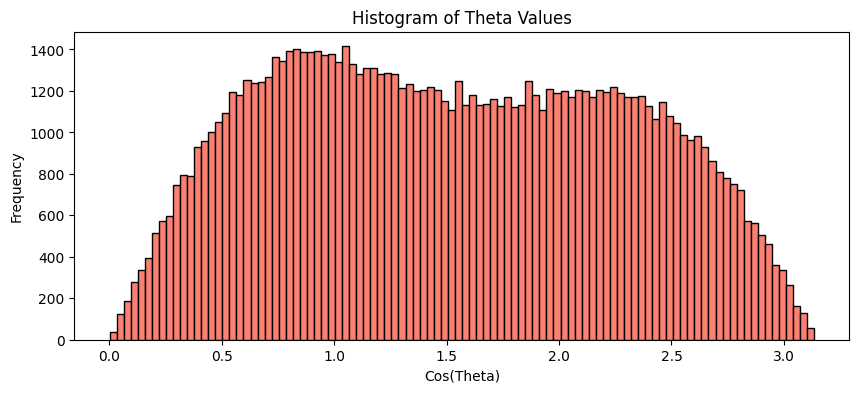

In [11]:
lego_plot(np.sqrt(s_rej_method), cos_theta_rej_method, 100, "E", "Cos", "New Method")
plot_histograms(s_rej_method, cos_theta_rej_method, 100)

In [18]:
cosLow = np.linspace(COSTHETAMIN, COSTHETAMAX, 5 + 1)

array([  100.,  4090.,  8080., 12070., 16060., 20050., 24040., 28030.,
       32020., 36010., 40000.])

In [21]:
cosLow = np.linspace(YMIN, YMAX, 5 + 1)
rng = np.random.RandomState(64)
weights_cos = np.ones(5)
chosen_intervals_s = rng.choice(5, size=2000, p=weights_cos / weights_cos.sum())

samples_s = cosLow[chosen_intervals_s] + rng.rand(2000) * np.diff([YMIN, YMAX])[0] / 5


In [22]:
samples_s

array([ 0.39396167,  0.08287782, -0.17760098, ..., -0.9014758 ,
        0.17376613, -0.05440573])

In [12]:
#part b
def setup_intervals_redux(NN=100, KK=2000, nIterations=4000, alpha_damp=1.5, seed=None):
    # Define the domain boundaries
    SMIN, SMAX = 10**2, 200**2
    COSTHETAMIN, COSTHETAMAX = -1, 1  

    # Initialize intervals with uniform spacing
    sLow = np.linspace(SMIN, SMAX, NN + 1)
    cosLow = np.linspace(COSTHETAMIN, COSTHETAMAX, NN + 1)

    delx = np.ones(NN) * (XMAX - XMIN) / NN 
    dely = np.ones(NN) * (YMAX - YMIN) / NN

    # Initialize weights for intervals (uniform at start)
    weights_s = np.ones(NN)
    weights_cos = np.ones(NN)

    # Random number generator
    rng = np.random.RandomState(seed)

    # Iteratively adjust intervals based on function evaluations
    for _ in range(nIterations):
        # Randomly choose intervals based on current weights
        chosen_intervals_s = rng.choice(NN, size=KK, p=weights_s / weights_s.sum())
        chosen_intervals_cos = rng.choice(NN, size=KK, p=weights_cos / weights_cos.sum())

        # Sample within chosen intervals and evaluate the function
        samples_s = sLow[chosen_intervals_s] + rng.rand(KK) * (SMAX - SMIN) / NN
        samples_cos = cosLow[chosen_intervals_cos] + rng.rand(KK) * (COSTHETAMAX - COSTHETAMIN) / NN
        f_vals = diff_cross_section(samples_s, samples_cos)  # Your differential cross-section function

        # Adjust weights based on function evaluations and damping
        for i in range(NN):
            interval_mask_s = chosen_intervals_s == i
            interval_mask_cos = chosen_intervals_cos == i
            weights_s[i] *= alpha_damp + (f_vals[interval_mask_s].sum() / KK)
            weights_cos[i] *= alpha_damp + (f_vals[interval_mask_cos].sum() / KK)

        # Normalize weights to maintain the same total interval size
        weights_s /= weights_s.sum() / NN
        weights_cos /= weights_cos.sum() / NN

        # Recalculate interval boundaries based on new weights
        sLow[1:-1] = np.cumsum(weights_s[:-1]) * (SMAX - SMIN) / NN + SMIN
        cosLow[1:-1] = np.cumsum(weights_cos[:-1]) * (COSTHETAMAX - COSTHETAMIN) / NN + COSTHETAMIN
        
        delx = np.diff(sLow)
        dely = np.diff(cosLow)

    return sLow, cosLow, delx, dely

In [13]:
def vegas_redux(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed=None):
    # Setup initial intervals using the setup_intervals function
    COSTHETAMIN, COSTHETAMAX = -1, 1  
    
    sLow, cosLow, delx, dely = setup_intervals_redux(NN, KK, nIterations, alpha_damp, seed)
    vegasRatioMax = vegasRatioFactor * F_VAL_MAX * NN * NN * delx[NN - 2] * dely[NN - 2]

    # Initialize variables
    nFunctionEval = 0
    s = []
    cos = []
    maxWeightEncountered = -1.0e20

    # Random number generator
    rng = np.random.RandomState(seed)

    # Main loop for sampling and evaluating
    while len(s) < nPoints:
        # Sample points within the refined intervals
        ixLow = rng.randint(0, NN)
        iyLow = rng.randint(0, NN)
        ss = sLow[ixLow] + delx[ixLow] * rng.uniform()
        cosT = cosLow[iyLow] + dely[iyLow] * rng.uniform()

        # Evaluate the differential cross-section at the sampled points
        f_vals = diff_cross_section(ss, cosT)
        ratio = f_vals * NN * NN * delx[ixLow] * dely[iyLow]
        nFunctionEval +=1

        # Update the maximum weight encountered, if necessary
        max_f_val = np.max(f_vals)
        if max_f_val > maxWeightEncountered:
            maxWeightEncountered = max_f_val

        # Store points based on the acceptance criterion
        # Accept the point if the Vegas ratio exceeds the vegasRatioFactor threshold
        if ratio > vegasRatioMax:
            print(f"ratio={ratio} exceeds vegasRatioMax={vegasRatioMax}, yy={cosT} program will now exit ")
        if ratio / vegasRatioMax > rng.uniform():
            s.append(ss)
            cos.append(cosT)

    # Prepare the output
    output = (
        s,
        cos,
        nFunctionEval,
        maxWeightEncountered,
        vegasRatioFactor * max_f_val,  # Maximum Vegas ratio considered for acceptance
    )
    
    return output



In [14]:
def setup_intervals(NN=100, KK=2000, nIterations=4000, alpha_damp=1.5, seed=64):
    """
    Input:
        NN: Number of intervals in [XMIN, XMAX] or [YMIN, YMAX]
        KK: function evaluations per iteration
        nIterations: number of iterations
        alpha_damp: damping parameter in the Vegas algorithm
    Return:
        Intervals specified by xLow, yLow: each is a 1D numpy array of size NN+1, with
        xLow[0] = 0, xLow[NN] = ym; yLow[0] = 0, yLow[NN] = ym
    """

    #intitial intervals: uniform intervals between XMIN/YMIN and XMAX/YMAX
    #Called xlow because it is the lower bound of the interval, 
    #as in xLow[i] is the lower bound of the ith interval
    # xLow[0] = 0, xLow[NN] = XMAX, xLow[NN+1] = upper end of XMAX
    xLow = XMIN + (XMAX - XMIN) / NN * np.arange(NN + 1) 
    # length of each interval
    #Will be delx = np.diff(xLow) later on 
    delx = np.ones(NN) * (XMAX - XMIN) / NN 
    # probability density in each interval
    # Will be px = 1.0 / delx / NN later on
    px = np.ones(NN) / (XMAX - XMIN)  # probability density in each interval

    #same as above but for y
    yLow = YMIN + (YMAX - YMIN) / NN * np.arange(NN + 1)    
    dely = np.ones(NN) * (YMAX - YMIN) / NN
    py = np.ones(NN) / (YMAX - YMIN)

    #random number generator. creates a class instance of RandomState
    generator = np.random.RandomState(seed=seed)
    for _ in range(nIterations):

        #In this section we are generating random numbers xx/yy 
        #in the intervals xLow/yLow. First create an array of KK random indeces 
        #between 0 and NN. Then use these indeces to select the lower bound of the interval
        #and add a random number between 0 and the length of the interval to get a random number
        #in the interval. This gets a random number in the interval

        #randit returns an array of KK random integers between 0 and NN
        ixLow = generator.randint(0, NN, size=KK)
        #uniform returns an array of KK random floats between 0 and 1
        xx = xLow[ixLow] + delx[ixLow] * generator.uniform(size=KK)
        iyLow = generator.randint(0, NN, size=KK)
        yy = yLow[iyLow] + dely[iyLow] * generator.uniform(size=KK)
        ff = diff_cross_section(xx, yy)

        #This section is the Vegas algorithm. It is a way to adaptively change the intervals
        #to get a better estimate of the integral. The idea is to make the intervals smaller
        #where the function is large and larger where the function is small.

        #The algorithm is based on the idea that the variance of the integral estimate is
        #proportional to the square of the function value. So we want to make the variance
        #of the function value in each interval as close to 1 as possible.
        #f2barx is the sum of the square of the function value in each interval
        #fbarx is the square root of f2barx
        #fbardelxSum is the sum of fbarx times the length of the interval
        #logArgx is the argument of the logarithm in the Vegas algorithm
        #mmx is the number of subintervals to split each interval into
        #xLowNew is the new lower bound of the intervals
        #nCombx is the number of subintervals in each interval
        #We do the same thing for y


        f2barx = np.array(
            [sum((ff[ixLow == i] / py[iyLow[ixLow == i]]) ** 2) for i in range(NN)]
        )
        fbarx = np.sqrt(f2barx)
        f2bary = np.array(
            [sum((ff[iyLow == i] / px[ixLow[iyLow == i]]) ** 2) for i in range(NN)]
        )
        fbary = np.sqrt(f2bary)

        fbardelxSum = np.sum(fbarx * delx)
        fbardelySum = np.sum(fbary * dely)
        logArgx = fbarx * delx / fbardelxSum
        logArgy = fbary * dely / fbardelySum

        mmx = KK * pow((logArgx - 1) / np.log(logArgx), alpha_damp)
        mmx = mmx.astype(int)
        mmx = np.where(mmx > 1, mmx, 1)
        mmy = KK * pow((logArgy - 1) / np.log(logArgy), alpha_damp)
        mmy = mmy.astype(int)
        mmy = np.where(mmy > 1, mmy, 1)

        xLowNew = [xLow[i] + np.arange(mmx[i]) * delx[i] / mmx[i] for i in range(NN)]
        xLowNew = np.concatenate(xLowNew, axis=0)
        yLowNew = [yLow[i] + np.arange(mmy[i]) * dely[i] / mmy[i] for i in range(NN)]
        yLowNew = np.concatenate(yLowNew, axis=0)

        nCombx = int(len(xLowNew) / NN)
        nComby = int(len(yLowNew) / NN)

        i = np.arange(NN)

        xLow[:-1] = xLowNew[i * nCombx]
        yLow[:-1] = yLowNew[i * nComby]

        delx = np.diff(xLow)
        dely = np.diff(yLow)
        px = 1.0 / delx / NN
        py = 1.0 / dely / NN

    return xLow, yLow, delx, dely


In [15]:

def vegas(
    nPoints,
    vegasRatioFactor,
    NN=100,
    KK=2000,
    nIterations=4000,
    alpha_damp=1.5,
    seed=None,
):
    xLow, yLow, delx, dely = setup_intervals(NN, KK, nIterations, alpha_damp, seed)
    vegasRatioMax = vegasRatioFactor * F_VAL_MAX * NN * NN * np.min(delx) * np.min(dely) # in the original code, delx[NN-2] is the smalles delx (where the maximum occurs)
    nFunctionEval = 0
    yy1_vegas_method = []
    yy2_vegas_method = []
    yy1_vrho_method = []
    yy2_vrho_method = []
    maxWeightEncountered = -1.0e20
    errs=0
    RatioList = []

    generator = np.random.RandomState(seed=seed)
    while len(yy1_vegas_method) < nPoints:
        ixLow = generator.randint(0, NN)
        xx = xLow[ixLow] + delx[ixLow] * generator.uniform()
        iyLow = generator.randint(0, NN)
        yy = yLow[iyLow] + dely[iyLow] * generator.uniform()
        yy1_vrho_method.append(xx)
        yy2_vrho_method.append(yy)
        nFunctionEval += 1
        f_val = diff_cross_section(xx, yy)
        ratio = f_val * NN * NN * delx[ixLow] * dely[iyLow]
        RatioList.append(ratio)
        if ratio > maxWeightEncountered:
            maxWeightEncountered = ratio
        if ratio > vegasRatioMax:
            errs+=1
            print(
                f"ratio={ratio} exceeds vegasRatioMax={vegasRatioMax}, yy={yy} program will now exit "
            )
            exit(99)
        if ratio / vegasRatioMax > generator.uniform():
            yy1_vegas_method.append(xx)
            yy2_vegas_method.append(yy)

    return {
        "ratios": RatioList,
        "yy1vrho": yy1_vrho_method,
        "yy2vrho": yy2_vrho_method,
        "S": yy1_vegas_method,
        "cos": yy2_vegas_method,
        "nFunEval": nFunctionEval,
        "maxWeightEncountered": maxWeightEncountered,
        "vegasRatioMax": vegasRatioMax,

    }

In [16]:
s_vegas, cos_vegas, nFunctionalEval_vegas, maxweightEncounteredvegas, vegasRatioFactor = vegas(1000, 0.1, 100, 2000, 4000, 1.5)
print(nFunctionalEval_vegas)
print(vegasRatioFactor)
print(maxweightEncounteredvegas)

ratio=-0.00017292444412333666 exceeds vegasRatioMax=-0.00019793209796055194, yy=0.868277781599982 program will now exit 
ratio=-6.632522126843363e-05 exceeds vegasRatioMax=-0.00019793209796055194, yy=0.6474335036393889 program will now exit 
ratio=-0.00011394491219661663 exceeds vegasRatioMax=-0.00019793209796055194, yy=-0.7280977539931998 program will now exit 
ratio=-0.00010948348727838856 exceeds vegasRatioMax=-0.00019793209796055194, yy=0.6166392646801021 program will now exit 
ratio=-0.00019336991463475114 exceeds vegasRatioMax=-0.00019793209796055194, yy=0.9067693553350719 program will now exit 
ratio=-7.975563688615154e-05 exceeds vegasRatioMax=-0.00019793209796055194, yy=-0.7891225306954759 program will now exit 
ratio=-0.00019388978763262274 exceeds vegasRatioMax=-0.00019793209796055194, yy=0.48072597832425146 program will now exit 
ratio=-0.00015545481516718247 exceeds vegasRatioMax=-0.00019793209796055194, yy=0.4519863722864525 program will now exit 
ratio=-0.000176422344609

ValueError: too many values to unpack (expected 5)

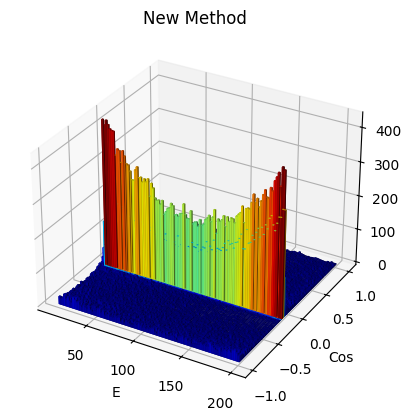

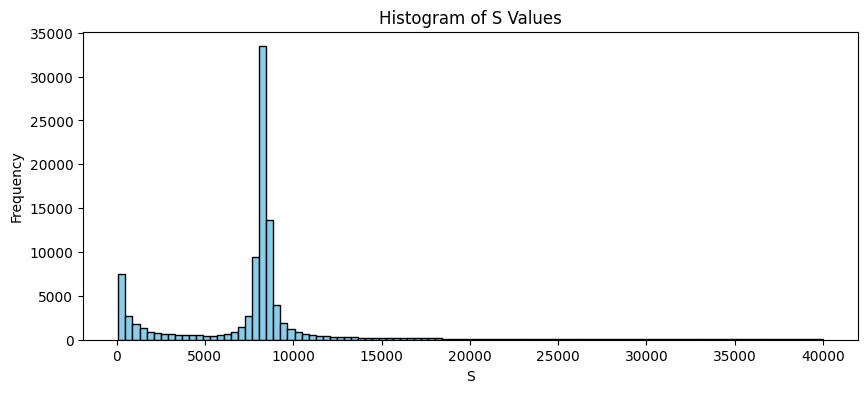

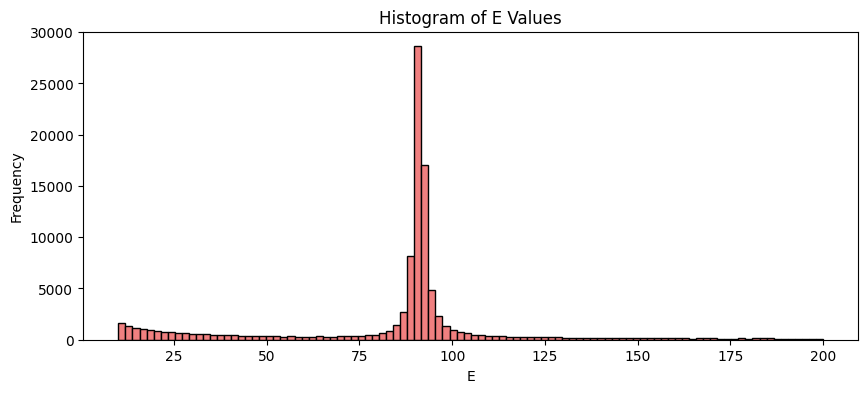

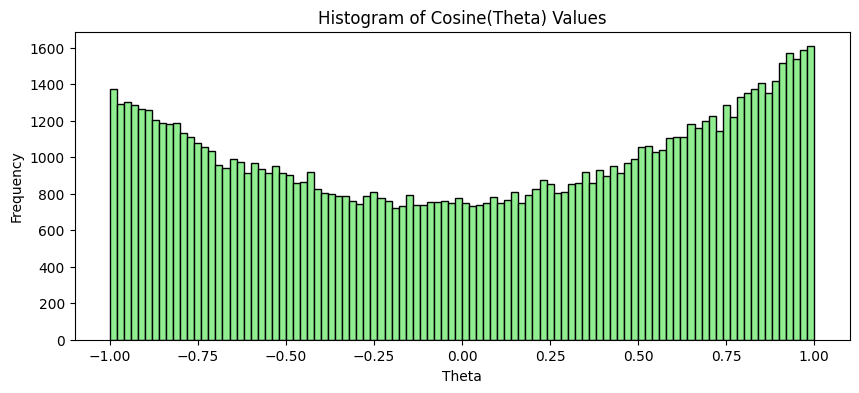

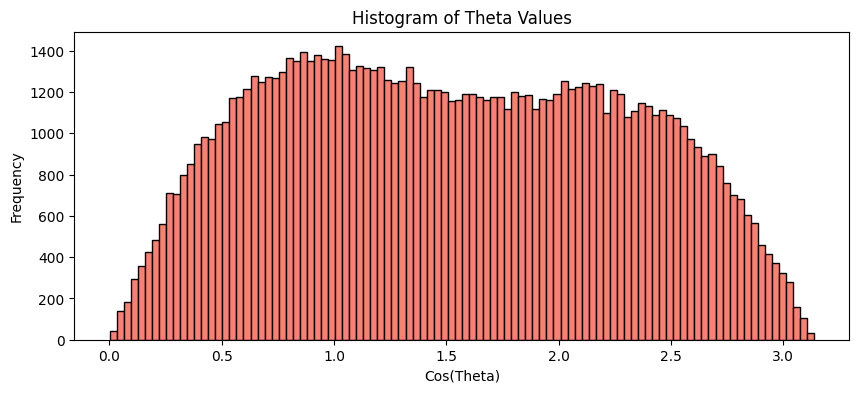

In [90]:
lego_plot(np.sqrt(s_vegas), cos_vegas, 100, "E", "Cos", "New Method")
plot_histograms(s_vegas, cos_vegas, 100)

In [23]:
import time
n_events = 10000
start_time_ar = time.time()
s_rej_method, cos_theta_rej_method, nFunctionEval_rej, maxWeightEncounteredReJ= brute_force(n_events)
end_time_ar = time.time()
time_ar = end_time_ar - start_time_ar

start_time_vegas = time.time()
s_vegas, cos_vegas, nFunctionalEval_vegas, maxweightEncounteredvegas,vegasRatioFactor = vegas(n_events,0.1,100,2000,4000,1.5)
end_time_vegas = time.time()
time_vegas = end_time_vegas - start_time_vegas

print("Acceptance-Rejection Method:")
print(f"Number of function evaluations: {nFunctionEval_rej}")
print(f"Time taken: {time_ar} seconds")

print("\nVEGAS Method:")
print(f"Time taken: {time_vegas} seconds")
print(f"Number of function evaluations: {nFunctionalEval_vegas}")

Acceptance-Rejection Method:
Number of function evaluations: 560
Time taken: 0.01751399040222168 seconds

VEGAS Method:
Time taken: 9.13202953338623 seconds
Number of function evaluations: 137


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


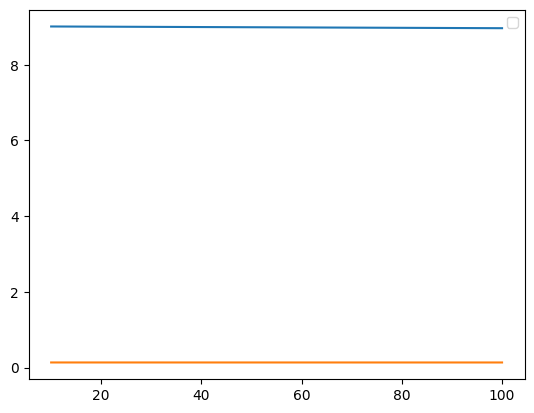

In [20]:
events = [1000,10000,50000,100000,300000]
ar_times = []
vegas_times = []
for i in enumerate(events):
    start_time_ar = time.time()
    s_rej_method, cos_theta_rej_method, nFunctionEval_rej, maxWeightEncounteredReJ= brute_force(n_events)
    end_time_ar = time.time()
    time_ar = end_time_ar - start_time_ar
    ar_times.append(time_ar)

    start_time_vegas = time.time()
    s_vegas, cos_vegas, nFunctionalEval_vegas, maxweightEncounteredvegas,vegasRatioFactor = vegas(n_events,0.1,100,2000,4000,1.5)
    end_time_vegas = time.time()
    time_vegas = end_time_vegas - start_time_vegas
    vegas_times.append(time_vegas)
plt.plot(events,vegas_times)
plt.plot(events,ar_times)
plt.legend()
plt.show()

10
100
1000
10000
100000
300000
700000
1000000
